In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from trendpy2 import methods as tm
from trendpy2 import models as tpm
from trendpy2 import __version__
import numpy as np
#from sklearn.metrics import r2_score
import pandas as pd
from scipy.optimize import least_squares

plt.style.use('ggplot') # if the style is not recognized, comment this line out

mpl.rcParams["figure.figsize"] = (20,7)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15





In [2]:
__version__

'1.0.2'

The **trendpy2** package supports you to easily fit your data. The following trends are supported. 

* linear 
* polynomial
* exponential 
* trigonometric 
* "free" (with three parameters) (e.g.```a*arctan(b*x+c)```, ```a*exp(b*x+c)```, ```a*(x*b)+c```)

You can easily predict values for new input and the coefficient of determination is readily available after the training.

You can use the ```trendpy2.methods``` by their own or directly use the ```Trend``` class from ```trendpy.models```.

Enjoy the following examples!


# trendpy2: Examples

* TrendPy **linReg** and NumPy polyfit first order
* Coefficient of determination from TrendPy and scikit-learn
* External data and TrendPy **polReg** and NumPy polyfit
* Object Oriented Programming(OOP): Trend class of TrendPy.models
* **freeReg** from TrendPy (with SymPy and SciPy's curve_fit)
* Exponential regression with **expReg** from TrendPy
* Comparison with non-linear least squares from SciPy
* Limitations of SciPy's non-linear least squares for peridodic functions
* Regression for periodic functions with **trigReg** from TrendPy (based on Fourier-Analysis)




##  trendpy linReg and NumPy polyfit first order

## coefficients

In [47]:

x = np.array([1, 2, 3])

y = np.array([1, 1.5, 3.5])

lin = tpm.Trend(x, y, 'linReg')

lin.coef


[1.25, -0.5]

or 

In [51]:
lin.coefs

[1.25, -0.5]

In [48]:
np.polyfit(x, y, 1)

array([ 1.25, -0.5 ])

## prediction 

In [49]:
lin.pred(3)

3.25

or

In [50]:
lin.predict(3)

3.25

In [6]:
np.poly1d(np.polyfit(x, y, 1))(3)

3.25

## coeffient of determination

In [7]:
#r2_score(y, np.poly1d(coef)(x))

lin.r2


0.893

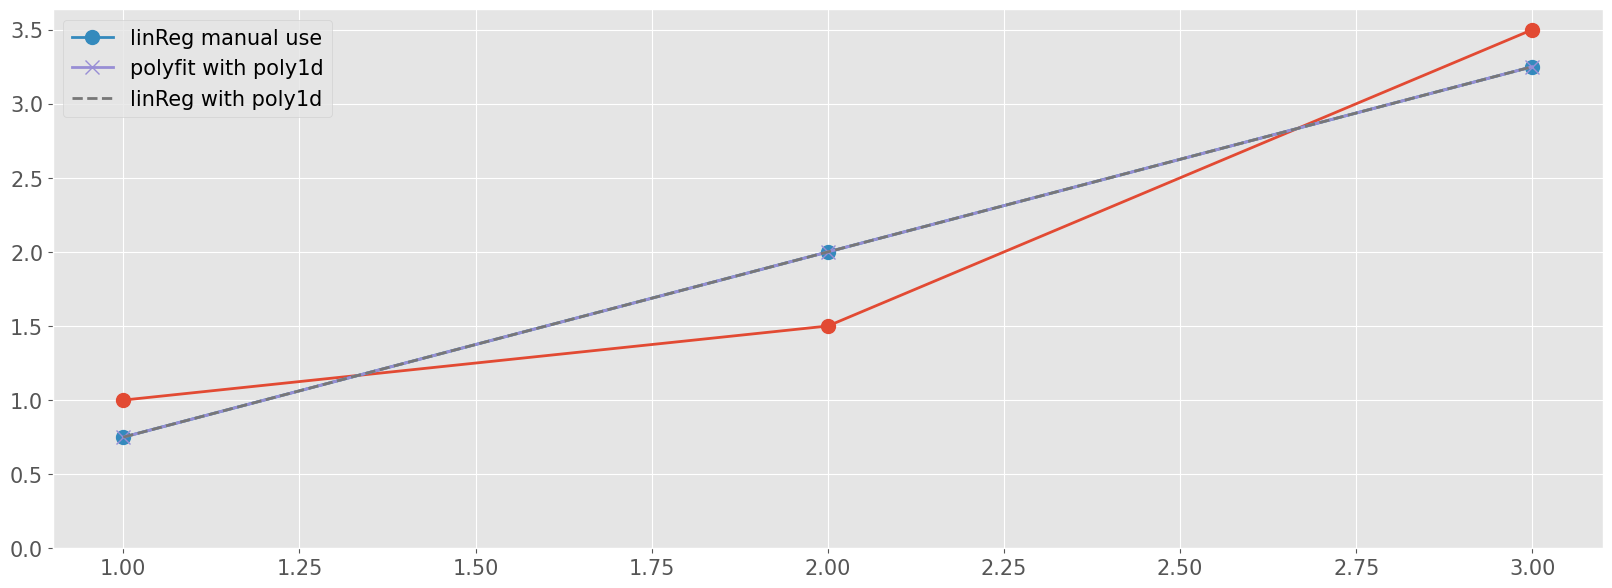

In [8]:

plt.plot(x, y, marker='o')
plt.plot(x, lin.coef[0]*x+lin.coef[1], label='linReg manual use', marker='o')
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), label='polyfit with poly1d', marker='x')
plt.plot(x, lin.pred(x), label='linReg with poly1d', linestyle='--')
plt.ylim(bottom=0)
plt.legend()


### External data

In [9]:
#ls data

In [10]:
data = pd.read_csv('data/airGermany_historical.csv',  index_col='Jahr')
data


,Jahr.1,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
Jahr,,,,,,,,,,,,,,,,,,
1881,year,7.55,7.54,7.66,6.61,7.49,6.96,7.54,7.54,8.14,7.97,7.12,8.28,6.71,7.46,7.11,6.66,7.31
1882,year,8.99,8.97,8.08,7.33,8.25,8.54,8.88,8.88,9.03,8.55,8.78,8.79,8.12,8.81,8.35,7.77,8.34
1883,year,8.42,8.41,7.77,6.85,7.96,7.95,8.39,8.39,8.71,8.26,8.18,8.51,7.46,8.32,7.87,7.31,7.88
1884,year,9.11,9.10,8.44,7.52,8.58,8.73,9.09,9.10,9.39,8.94,8.86,9.18,8.21,8.94,8.47,7.89,8.57
1885,year,8.40,8.39,7.82,7.04,7.66,7.68,7.94,7.94,8.31,8.01,7.62,8.30,7.73,8.07,7.67,7.16,7.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,year,10.36,10.35,9.89,9.43,9.91,9.76,10.15,10.15,10.35,10.25,9.71,10.50,9.93,10.32,9.96,9.50,9.94
2016,year,10.00,9.98,9.29,8.88,9.44,9.62,9.94,9.94,10.11,9.76,9.61,9.90,9.37,10.08,9.63,9.03,9.55
2017,year,9.92,9.91,9.40,8.83,9.56,9.47,9.97,9.97,10.31,10.01,9.57,10.21,9.39,10.03,9.63,9.10,9.58


In [11]:

x_in = data.index.values
y_out = data['Deutschland'].values


## Higher Order Polynomial Regression

In [12]:

lin = tpm.Trend(x_in, y_out, 'linReg')
pol = tpm.Trend(x_in, y_out, 'polReg', 3)

pol



In [13]:
pol.coef

array([ 3.70560121e-06, -2.15587164e-02,  4.18080209e+01, -2.70170268e+04])

In [14]:
pol.r2

0.428

In [15]:
pol.deg

3

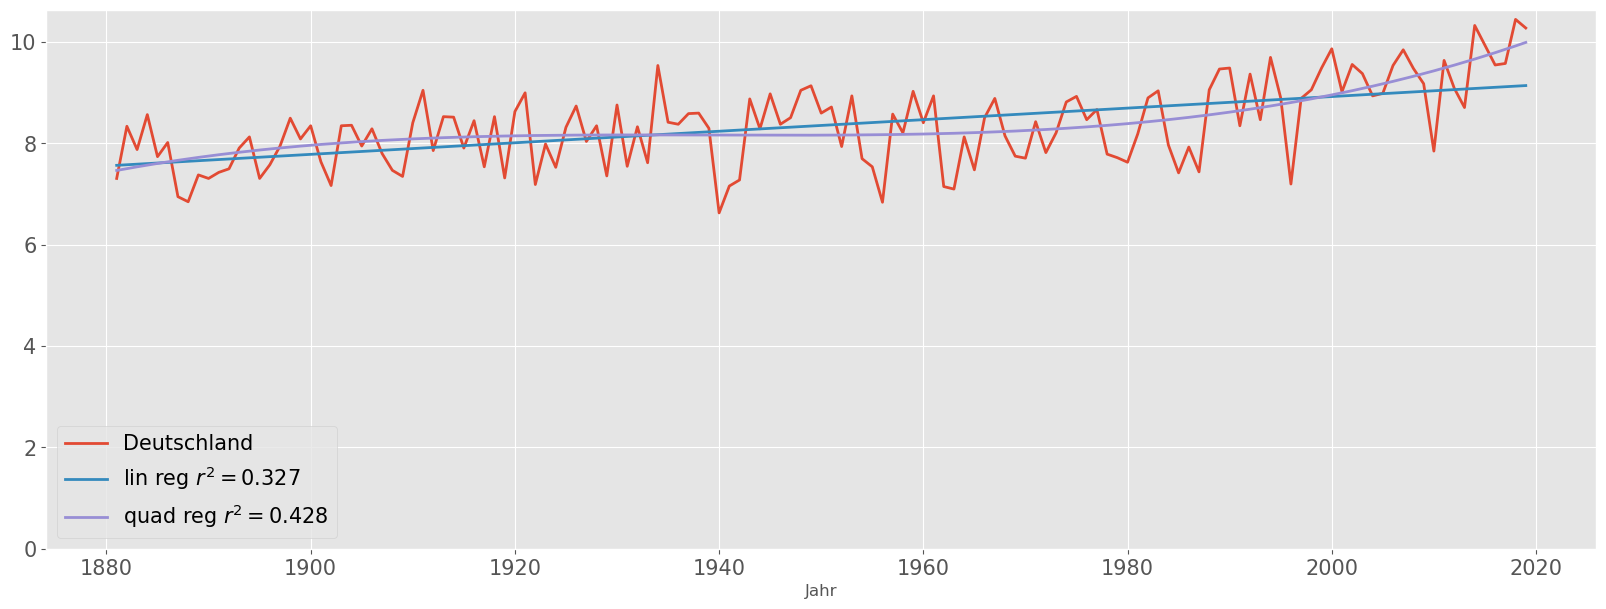

In [16]:
data['Deutschland'].plot()
plt.plot(x_in, lin.pred(x_in), label=f'lin reg $r^2={lin.r2}$')
plt.plot(x_in, pol.pred(x_in), label=f'quad reg $r^2={pol.r2}$')
plt.ylim(bottom=0)

plt.legend()

## Exponential Regression


In [17]:
expData = pd.read_csv('data/exp_perturbed.csv', index_col='Unnamed: 0')
expData


,1
1,85.400686
4,51.284862
7,24.652080
10,12.878236
15,0.368365


In [18]:
expReg = tpm.Trend(expData.index.values, expData['1'].values, ansatz='expReg')
expReg.coef


[224.1596653931257, -0.376089832692362]

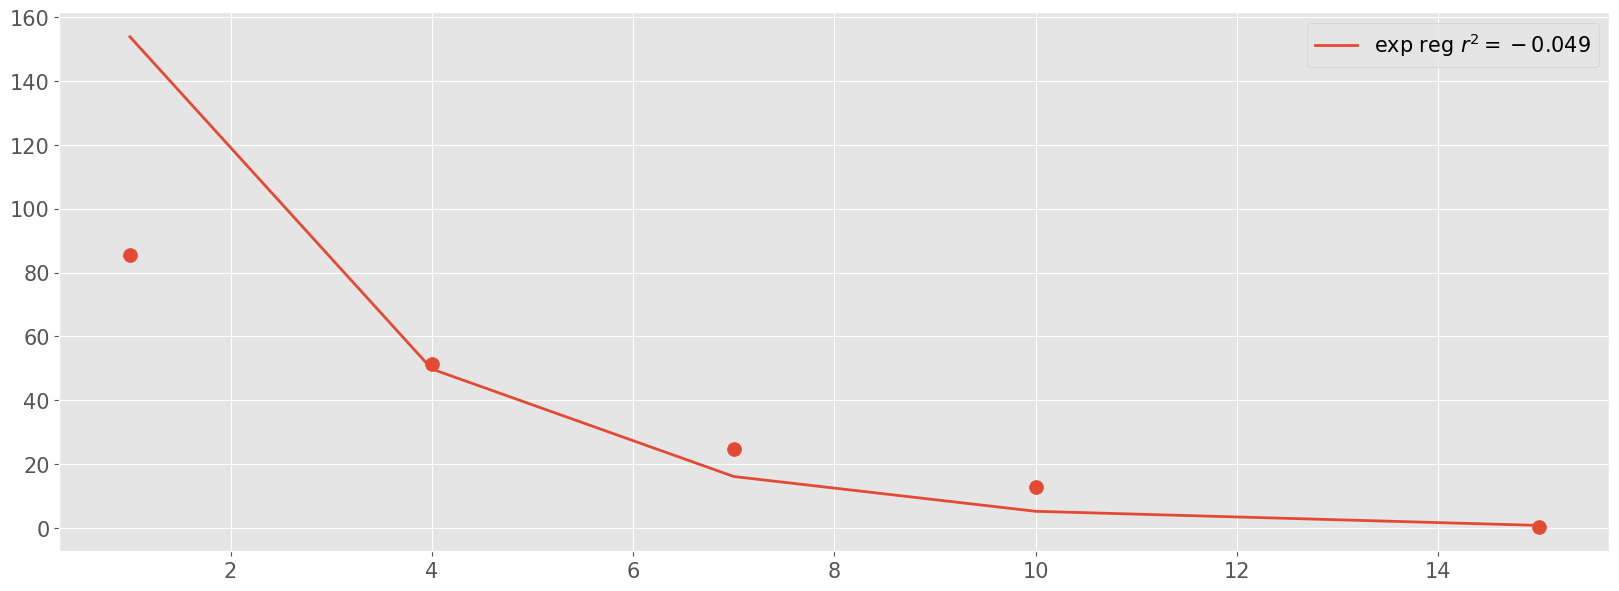

In [19]:
plt.scatter(expData.index.values, expData['1'].values)
plt.plot(expData.index.values, expReg.pred(expData.index.values), label=f'exp reg $r^2={expReg.r2}$')
plt.legend()


In [20]:
x = np.array([1, 4, 7, 10, 15])
y = np.array([80.2, 45.5, 24.5, 13.9, 4.7])

expReg = tpm.Trend(x, y, ansatz='expReg')
expReg.coef


[100.83795486906686, -0.20235712969164302]

## freeReg with SymPy based TrendPy methods (with SciPys curve_fit)

freeReg expects an ansatz with 3 parameters, for instance $$ansatz(x)=a\cdot\exp((b+c)\cdot x)$$

or

$$ansatz(x)=a\cdot\arctan(b\cdot x+c)$$

In [21]:

# with freeReg

freeExp = tpm.Trend(x, y, ansatz='freeReg', freeRegAnsatz='a*exp((b+c)*x)')

print(freeExp.r2)

print(freeExp.coef[0], freeExp.coef[1]+freeExp.coef[2])


1.0
97.79600930942145 -0.19531270877632778


In [22]:
freeExp.freeRegAnsatz


'a*exp((b+c)*x)'

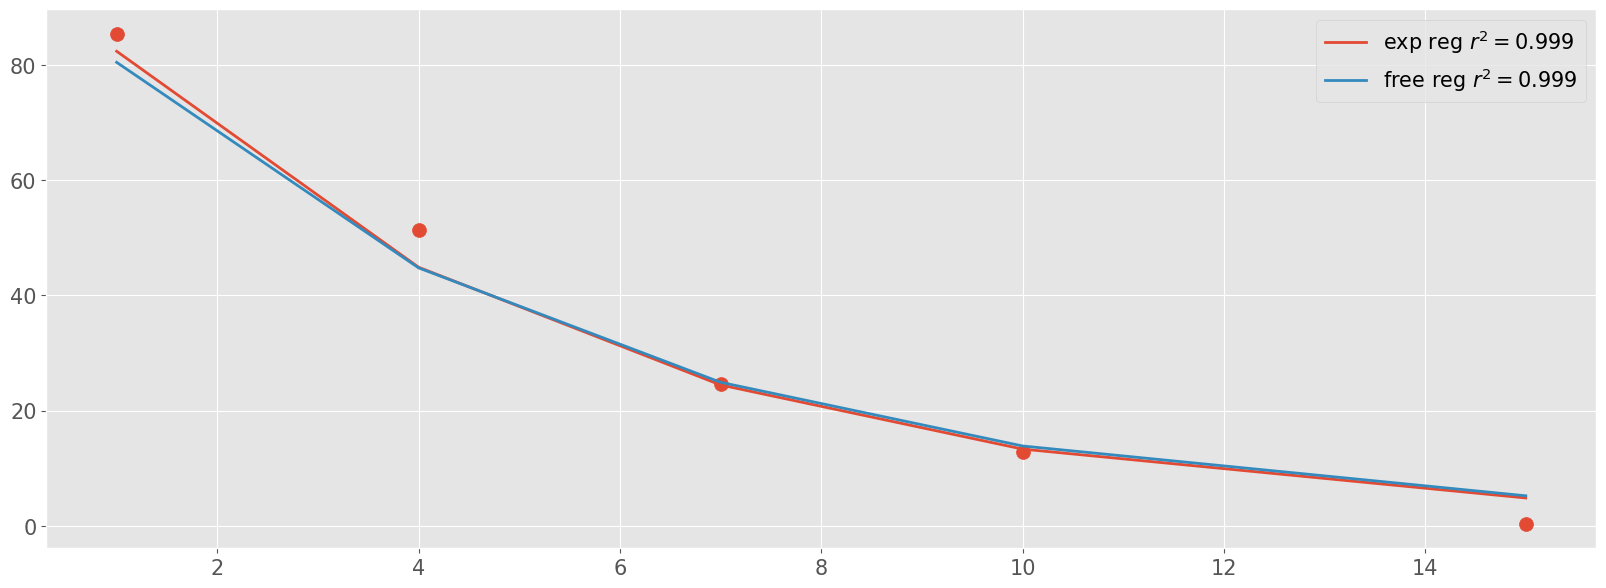

In [23]:
plt.scatter(expData.index.values, expData['1'].values)
plt.plot(expData.index.values, expReg.pred(expData.index.values), label=f'exp reg $r^2={expReg.r2}$')
plt.plot(expData.index.values, freeExp.pred(expData.index.values), label=f'free reg $r^2={expReg.r2}$')
plt.legend()


In [24]:
data = pd.read_csv('data/arctan_pert.csv')

x_in = data['Unnamed: 0']
y_out =  data['werte']




### freeReg with trendpy2.methods

In [25]:

sym_ansatz = 'a*arctan(b*x+c)'

sym_ansatz_coef = tm.freeReg(x_in, y_out, sym_ansatz)
sym_ansatz_coef


array([ 0.13407143,  3.81853717, -0.09965444])

### freeReg with trendpy2.models (OOP)


In [26]:

free = tpm.Trend(x_in, y_out, ansatz='freeReg', freeRegAnsatz='a*arctan(b*x+c)')


In [27]:
free.coef

array([ 0.13407143,  3.81853717, -0.09965444])

In [28]:
free.r2

0.99

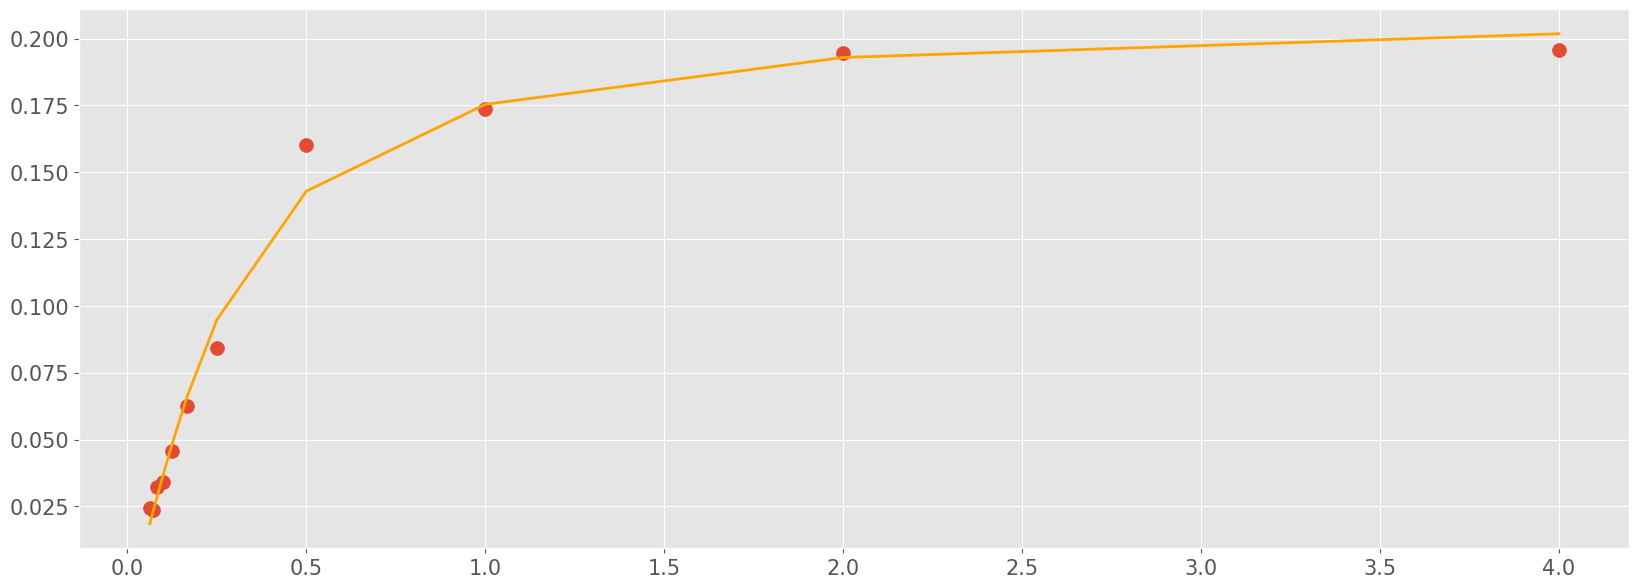

In [29]:

plt.scatter(x_in, y_out)
plt.plot(x_in, free.pred(x_in), color='orange')


## Comparison with non-linear least squares from SciPy

In [30]:
data = pd.read_csv('data/airGermany_historical.csv',  index_col='Jahr')

x_in = data['Deutschland'].index.values
y_out = data['Deutschland'].values


In [31]:
def err(x):
    
    wert = y_out-(x[0]*x_in+x[1])
    
    return wert

x0 = np.array([0, 0])
res = least_squares(err, x0)

x = res.x
x

array([ 1.14107422e-02, -1.38946883e+01])

In [32]:
lin.coef

[0.01141074221368605, -13.894688323882042]

In [42]:
lin.coefs

[0.01141074221368605, -13.894688323882042]

In [33]:
free = tpm.Trend(x_in, y_out, ansatz='freeReg', freeRegAnsatz='a*x+(b+c)')
free.coef 


array([ 1.14107422e-02, -1.37921994e+05,  1.37908099e+05])

In [34]:
free.coef[1]+free.coef[2]


-13.894688323925948

In [35]:
def err(x):
    
    wert = np.array([1, 1.5, 3.5]) - (x[0]*np.array([1, 2, 3])+x[1])  #y_out-(x[0]*x_in+x[1])
    
    return wert

x0 = np.array([0, 0])
res = least_squares(err, x0)

x = res.x
x

array([ 1.25, -0.5 ])

In [36]:
tpm.Trend(np.array([1, 2, 3]), np.array([1, 1.5, 3.5]), 'linReg').coef


[1.25, -0.5]

### trigReg (sinusoid-regression)

In [37]:

f = 3
shift = 30*np.pi/180.
#shift = 10
t = np.linspace(0, 1, 500)
x_org = np.cos(2*np.pi*f*t+shift)
x_test = x_org + 0.3*np.random.randn(len(t))



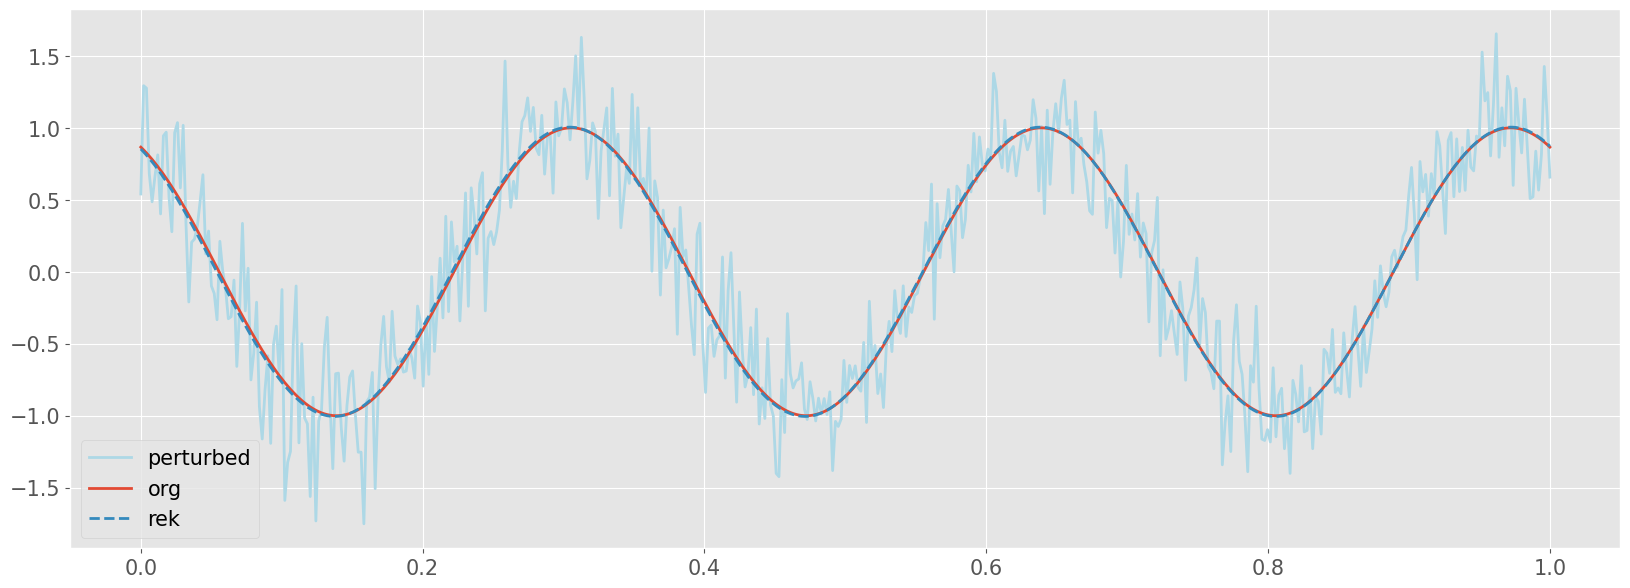

In [38]:

amplitude, frequenz, angle = tm.trigReg(t, x_test)

plt.plot(t, x_test, label='perturbed', color='lightblue')
plt.plot(t, x_org, label='org')
plt.plot(t, amplitude*np.cos(2*np.pi*frequenz*t+angle), linestyle='--', label='rek')
plt.legend()


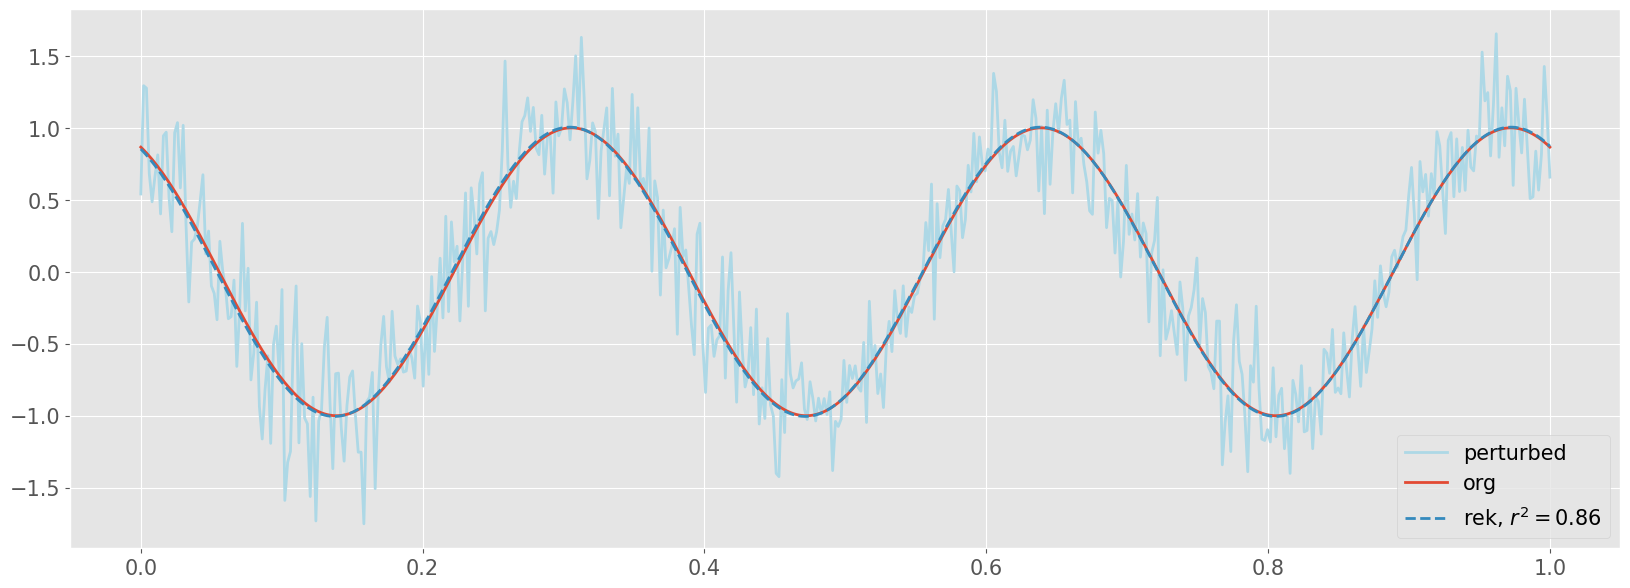

In [44]:

sine = tpm.Trend(t, x_test, 'trigReg')

plt.plot(t, x_test, label='perturbed',  color='lightblue')
plt.plot(t, x_org, label='org')
plt.plot(t, sine.predict(t), linestyle='--', label=f'rek, $r^2={sine.r2}$')
plt.legend()


### Limitations of non-linear least squares for peridodic functions

In [40]:

def err_sine(x):
    
    wert = x_test-x[0]*np.sin(x[1]*t+x[2])
    
    return wert

x0 = np.array([0, 0, 0])
res = least_squares(err, x0)

x = res.x
x




array([ 1.25000042, -0.50000095,  0.        ])

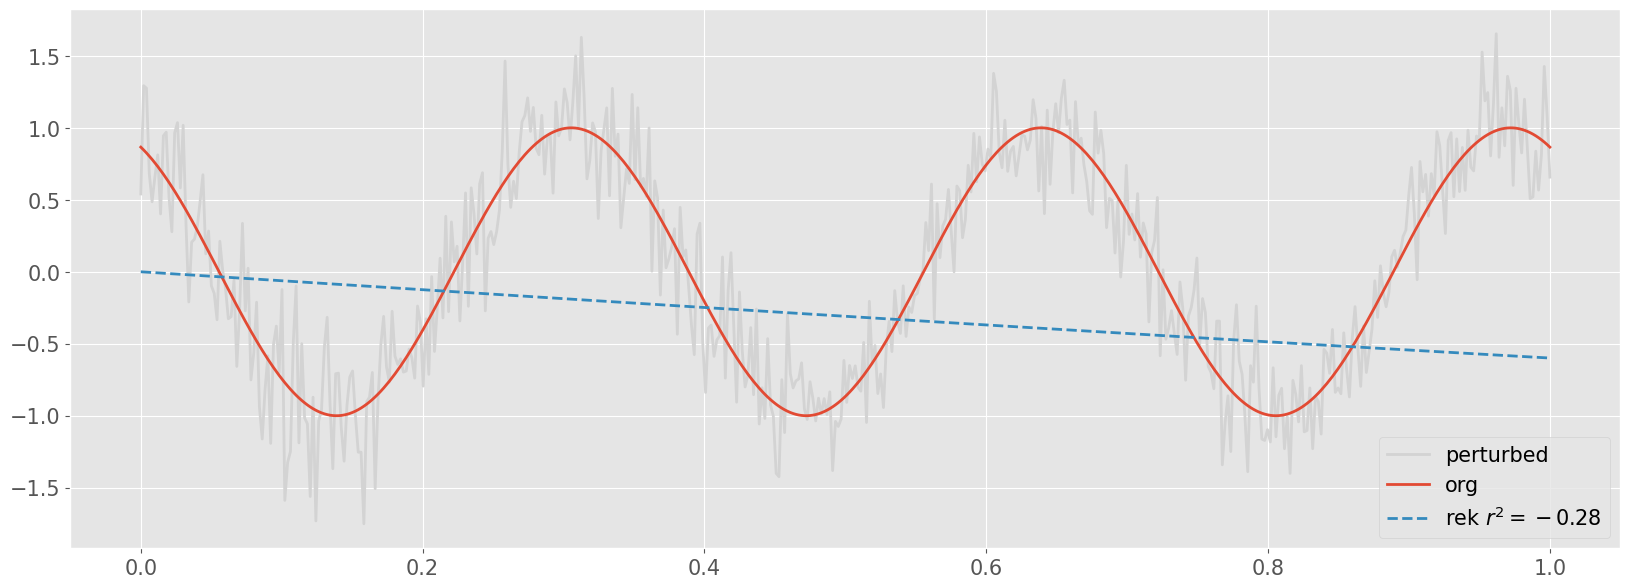

In [41]:

r = tm.r2(x_test, x[0]*np.sin(x[1]*t+x[2]))
r = round(r, 2)

plt.plot(t, x_test, label='perturbed',  color='lightgrey')
plt.plot(t, x_org, label='org')
plt.plot(t, x[0]*np.sin(x[1]*t+x[2]), linestyle='--', label=f'rek $r^2={r}$')
plt.legend()
